# QCTO - Workplace Module

### Sales and Customer Behavior Analysis
#### Done By: Thavaagh Pillay & Mikaela Thakur

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To analyze sales, customer behavior, and regional performance in the Superstore dataset. The study aims to identify patterns and insights that can drive business decisions, such as improving profitability, optimizing product inventory, and enhancing customer segmentation strategies.
* **Details:** 
The dataset contains sales and operational data for a fictional superstore. It spans 9,426 entries and 24 columns, detailing orders, customer demographics, product categories, and transactional data.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# numpy: For numerical computations and array operations.
# pandas: For data manipulation and analysis.
# matplotlib.pyplot: For creating basic data visualizations.
# seaborn: For advanced and stylish statistical plots.

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The data is a dataset representing transactional records for a superstore. 
* **Details:** The data was sourced from a GitHub Respority. No details were given on the collection of the data but the data looks like it was gathered from a superstore. The data has 9,426 rows and 24 columns. 

The dataset used in this analysis can be accessed and downloaded from the following link:

https://github.com/Explore-AI/Public-Data/blob/master/insurance_claims.csv

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
# Define the file path
file_path = "C:\\Users\\Colin\\Downloads\\superstore.xlsx"

# Load the Excel file
superstore_data = pd.ExcelFile(file_path)

# Check available sheet names
print(superstore_data.sheet_names)

# Load the primary sheet (assuming it's "Orders")
orders_df = superstore_data.parse('Orders')

# Display the first few rows
print(orders_df.head())

['Orders', 'Returns', 'Users']
   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Or

In [3]:
orders_df.shape

(9426, 24)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
orders_df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [5]:
orders_df["Product Base Margin"].fillna(orders_df["Product Base Margin"].mean(), inplace= True)

In [6]:
orders_df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [7]:
# Identify categorical columns dynamically
categorical_columns = orders_df.select_dtypes(include=['object', 'category']).columns

# Print value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for '{column}':\n")
    print(orders_df[column].value_counts(), "\n")


Value counts for 'Order Priority':

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64 

Value counts for 'Customer Name':

Customer Name
Louis Parrish            27
Jenny Gold               26
Leigh Burnette Hurley    22
Sean N Boyer             22
Andrew Gonzalez          21
                         ..
Kent Hoover               1
Ruby Booth                1
Bill Hudson               1
Angela Wooten             1
Janice Fletcher           1
Name: count, Length: 2703, dtype: int64 

Value counts for 'Ship Mode':

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64 

Value counts for 'Customer Segment':

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64 

Value counts for 'Product Category':

Product Category
Office Supplies    518

In [8]:
# data cleaning 
orders_df["Order Priority"]= orders_df["Order Priority"].replace("Critical ", "Critical")

In [9]:
orders_df["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


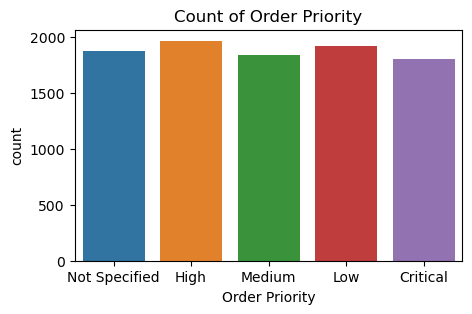

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(data= orders_df, x="Order Priority")
plt.title("Count of Order Priority")
plt.show()

In [11]:
x= orders_df["Ship Mode"].value_counts().index
y= orders_df["Ship Mode"].value_counts().values

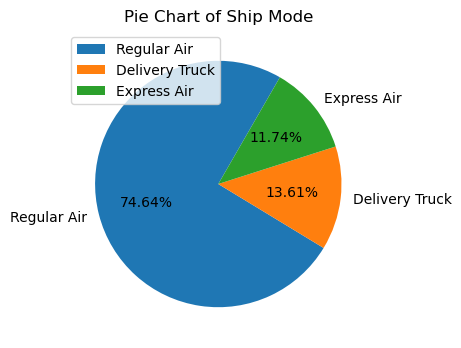

In [12]:
# Ship Mode
plt.figure(figsize=(5, 4))
plt.pie(y, labels= x, startangle= 60, autopct= "%0.2f%%")
plt.legend(loc= 2)
plt.title("Pie Chart of Ship Mode")
plt.show()

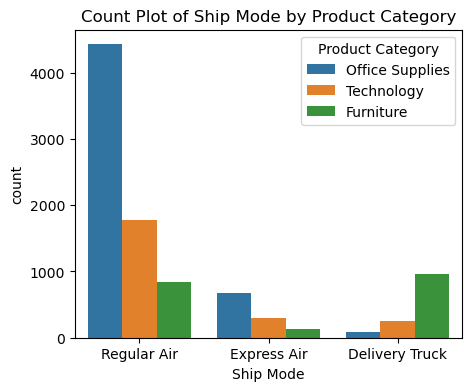

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(data= orders_df, x="Ship Mode", hue="Product Category")
plt.title("Count Plot of Ship Mode by Product Category")
plt.show()

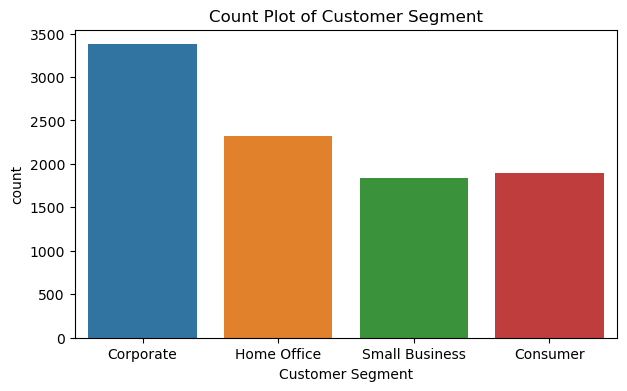

In [14]:
plt.figure(figsize=(7, 4))
sns.countplot(data= orders_df, x="Customer Segment")
plt.title("Count Plot of Customer Segment")
plt.show()

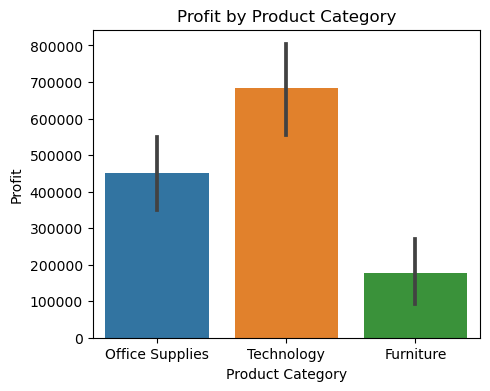

In [15]:
plt.figure(figsize=(5, 4))
sns.barplot(data=orders_df, x="Product Category", y="Profit", estimator=sum)
plt.title("Profit by Product Category") 
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [18]:
# Data preparation
# Select features and target
features = ["Sales", "Discount", "Quantity ordered new"]
target = "Profit"

# Drop rows with missing values
orders_df = orders_df.dropna(subset=features + [target])

# Split data into train and test sets
X = orders_df[features]
y = orders_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model 2: Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Model 3: Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Output the models for evaluation (optional)
print("Models trained successfully. Evaluate them on the test set using your preferred metrics.")


Models trained successfully. Evaluate them on the test set using your preferred metrics.


In [19]:
# Predictions from each model
linear_preds = linear_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)


In [20]:
# Define a function to evaluate models
def evaluate_model(y_test, predictions, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, predictions):.2f}")
    print(f"R² Score: {r2_score(y_test, predictions):.2f}")
    print("\n")

# Evaluate each model
evaluate_model(y_test, linear_preds, "Linear Regression")
evaluate_model(y_test, tree_preds, "Decision Tree")
evaluate_model(y_test, forest_preds, "Random Forest")

Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 361.07
Mean Squared Error (MSE): 800546.46
R² Score: 0.17


Evaluation Metrics for Decision Tree:
Mean Absolute Error (MAE): 479.23
Mean Squared Error (MSE): 1222025.30
R² Score: -0.26


Evaluation Metrics for Random Forest:
Mean Absolute Error (MAE): 384.17
Mean Squared Error (MSE): 792336.30
R² Score: 0.18




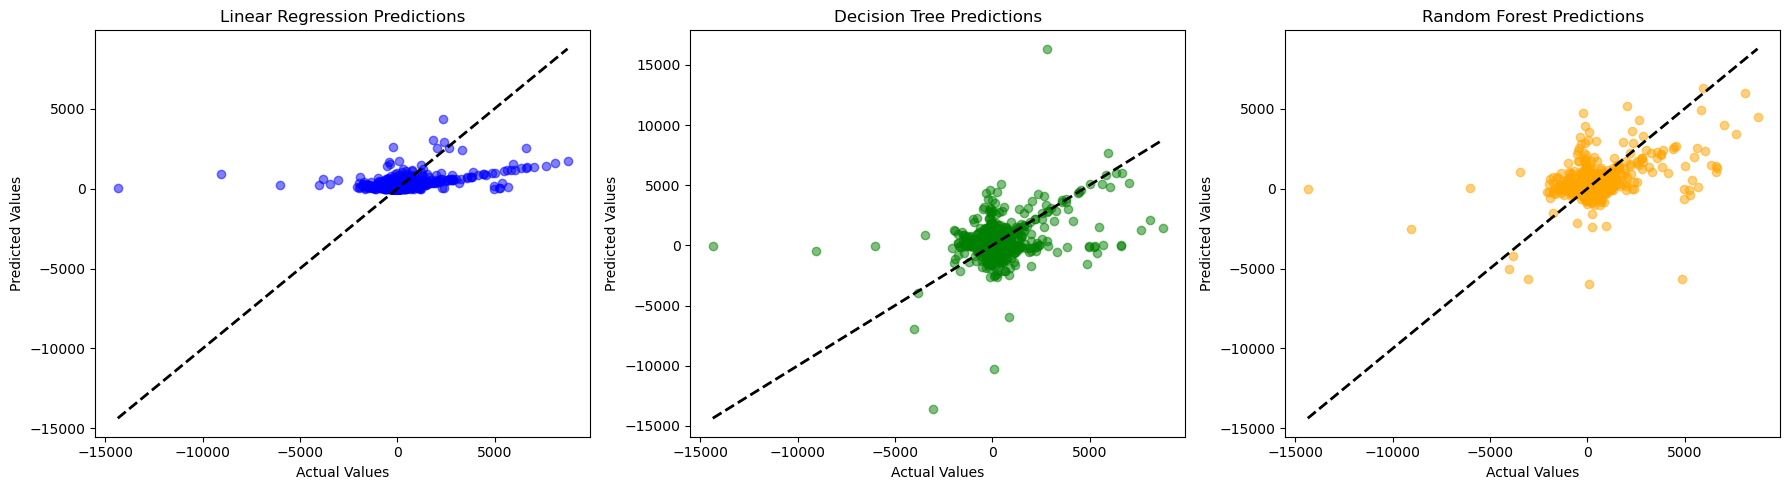

In [21]:
# Create a figure with three subplots
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_preds, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, tree_preds, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Predictions")

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, forest_preds, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Predictions")

# Display the plots
plt.tight_layout()
plt.show()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

## **Model Performance Comparison**

### Linear Regression
- **MAE**: 361.07 (Lowest among the three, indicating it predicts closer to the actual values on average).
- **MSE**: 800,546.46 (Moderate).
- **R²**: 0.17 (Explains 17% of the variance in the target variable, indicating weak predictive power).

### Decision Tree
- **MAE**: 479.23 (Highest among the three, meaning its predictions deviate the most from actual values).
- **MSE**: 1,222,025.30 (Worst performance with higher squared errors).
- **R²**: -0.26 (Negative value means the model is worse than using the mean as a predictor).

### Random Forest
- **MAE**: 384.17 (Slightly higher than Linear Regression, but much better than Decision Tree).
- **MSE**: 792,336.30 (Lowest among the three, indicating fewer extreme errors).
- **R²**: 0.18 (Explains 18% of the variance, slightly better than Linear Regression).


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


### **Final Model: Random Forest**

After comparing the performance of three models—Linear Regression, Decision Tree, and Random Forest—**Random Forest** emerges as the best-performing model for predicting the target variable.

#### **Performance Summary:**

- **MAE**: 384.17 (Slightly higher than Linear Regression, but still much lower than the Decision Tree)
- **MSE**: 792,336.30 (Lowest among the three models, indicating fewer extreme errors and more stable predictions)
- **R²**: 0.18 (Slightly better than Linear Regression, explaining 18% of the variance in the target variable)

#### **Why Random Forest was Chosen:**

1. **Lower MSE**: Random Forest has the lowest Mean Squared Error (MSE), which means it performs better in minimizing large prediction errors compared to the other models.
   
2. **Better Predictive Stability**: Its MAE is slightly higher than that of Linear Regression but still much better than the Decision Tree, indicating it provides a more balanced and reliable prediction.

3. **Higher R² than Decision Tree**: While the R² value of 0.18 is still quite low, it is higher than the Decision Tree's negative value, indicating that Random Forest outperforms the Decision Tree by a significant margin.

4. **Flexibility and Robustness**: Random Forest, being an ensemble method, is less prone to overfitting and can capture complex patterns in the data better than a single Decision Tree. It also handles non-linear relationships better than ce for this project.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In conclusion, while none of the models show perfect predictive power (R² values are all low), **Random Forest** stands out due to its overall stability, minimal extreme errors, and better generalization compared to the other models. Thus, it is the final choice for this project.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
Thavaagh Pillay
Mikaela Thakur
